In [ ]:
import csv
import numpy as np
from google.colab import files
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from keras import optimizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#for second model


local_zip = '/content/drive/My Drive/handwrittenmathsymbols.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

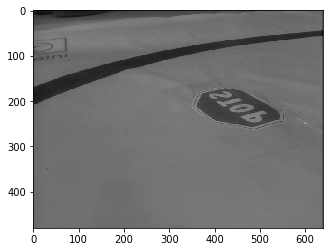

[[ 41  41  42 ... 118  97 236]
 [ 31  37  39 ... 113  91 235]
 [ 38  39  42 ... 106  86 235]
 ...
 [110 112 109 ... 121  96 235]
 [110 109 110 ... 118  95 235]
 [110 112 110 ... 118  94 235]]
(480, 640)


In [ ]:
DATADIR = "/content/drive/My Drive/data/photo"

CATEGORIES = ["1","2","3","new"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  
print(img_array)
print(img_array.shape)

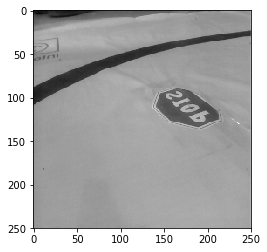

In [ ]:
#TO CHANGE THE SIZE OF IMAGE
IMG_SIZE = 250

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
source_images_m1 = []
source_path_m1 = []
DATADIR = "/content/drive/My Drive/data/photo"

def create_source_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
          new_array = np.array(new_array).astype('float32') / 255.
          source_images_m1.append(new_array)
          source_path_m1.append(class_num)
            
create_source_data()

print(len(source_images_m1))
print(len(source_path_m1))

100%|██████████| 200/200 [01:44<00:00,  1.04s/it]

721
721


In [ ]:
source_path_m1 = np.array(source_path_m1)
i = 0
while(i<6074):
  if source_path_m1[i] == 2 && source_path_m1[i] == 3:
    source_path_m1[i] = 1
  if source_path_m1[i] == 5 && source_path_m1[i] == 6 :
    source_path_m1[i] = 2
  if source_path_m1[i] == 6 &&  :
    source_path_m1[i] = 3
  if source_path_m1[i] == 8 :
    source_path_m1[i] = 4
    
  i = i+1
  
print(len(source_path_m1))


6074


In [ ]:
#for second model


source_images_m2 = []
source_path_m2 = []


def create_source_data():
    for category in CATEGORIES(2):  # do dogs and cats

        path = os.path.join(DATADIR(2),category)  # create path to dogs and cats
        class_num = CATEGORIES(2).index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                source_images_m2.append(new_array)
                source_path_m2.append(class_num)# add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_source_data()

print(len(source_images_m2))
print(len(source_path_m2))

In [ ]:
X = np.array(source_images_m1)
Y = np.array(source_path_m1)

# print(source_images_m1[1])
# print(source_path_m1)

from keras.utils import to_categorical

Y = to_categorical(Y , num_classes = 4)

print(X.shape)
print(Y.shape)

#source_images_m2 = np.array(source_images_m2)
#source_path_m2 = np.array(source_path_m2)
#print(source_images_m2.shape)
#print(source_path_m2.shape)
#print(source_images_m2[1])
#print(source_path_m2)
#print(b[1,0])
#training_images = np.array(b[:,0])

(721, 250, 250)
(721, 4)


In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.9,test_size=0.1)
# print ("X_train_m1: ", X_train_m1)
# print ("y_train_m1: ", y_train_m1)
# print ("X_test_m1: ", X_test_m1)
# print ("y_test_m1: ", y_test_m1)
# print (X_train_m1.shape)
#X_train:  [4, 9, 3, 5, 7, 6, 1]
#y_train:  [16, 81, 9, 25, 49, 36, 1]
#X_test:  [8, 2, 0]
#y_test:  [64, 4, 0]


#X_train_m2, X_test_m2, y_train_m2, y_test_m2 = model_selection.train_test_split(source_images_m2, source_path_m2, train_size=0.9,test_size=0.1, random_state=101)
#print ("X_train_m2: ", X_train_m2)
#print ("y_train_m2: ", y_train_m2)
#print ("X_test_m2: ", X_test_m2)
#print ("y_test_m2: ", y_test_m2)
#print (X_train_m2.shape)

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)


# print(X_train_m1_images.shape)
# print(X_test_m1_images.shape)


#print(X_train_m2_images.shape)
#print(X_test_m2_images.shape)


In [ ]:
print(y_test.shape)
print(X_test.shape)

(73, 4)
(73, 250, 250, 1)


In [ ]:
from keras import optimizers
from keras import regularizers

from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu' , padding = 'same' , input_shape = (250,250,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())

# model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu' , padding = 'same'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(64 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu' , padding = 'same' ))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(BatchNormalization())

model.add(Flatten())

# model.add(Dense(1024 , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

model.add(Dense(128 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4 , activation = 'softmax'))

sgd = optimizers.SGD(lr=0.0001, decay=1e-4, momentum=0.9, nesterov=True)

model.compile(loss= 'categorical_crossentropy' ,
              optimizer="sgd",
              metrics=["accuracy"])
# history = model.fit_generator(train_datagen.flow(X_train_m1_images, y_train_m1, batch_size=32),
#                               steps_per_epoch=len(X_train_m1_images) / 32,
#                               epochs=15,
#                               validation_data=validation_datagen.flow(X_test_m1_images, y_test_m1, batch_size=32),
#                               validation_steps=len(X_test_m1_images) / 32)
history = model.fit(X_train , y_train , epochs = 10 , batch_size = 16 , validation_split = 0.2)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 518 samples, validate on 130 samples
Epoch 1/10
518/518 [==============================] - 6s 11ms/step - loss: 0.4132 - acc: 0.8900 - val_loss: 0.2352 - val_acc: 0.9615
Epoch 2/10
518/518 [==============================] - 1s 3ms/step - loss: 0.0645 - acc: 0.9903 - val_loss: 0.1801 - val_acc: 0.9923
Epoch 3/10
518/518 [==============================] - 1s 3ms/step - loss: 0.0366 - acc: 0.9981 - val_loss: 0.0442 - val_acc: 0.9923
Epoch 4/10
518/518 [==============================] - 1s 3ms/step - loss: 0.0344 - acc: 0.9942 - val_loss: 0.0201 - val_acc: 1.0000
Epoch 5/10
518/518 [==============================] - 1s 3ms/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.0145 - val_acc: 1.0000
Epoch 6/10
518/518 [==============================] - 1s 3ms/step - 

In [ ]:
acc = model.evaluate(X_test , y_test)

73/73 [==============================] - 0s 3ms/step


In [ ]:
acc

[0.005063350436800759, 1.0]

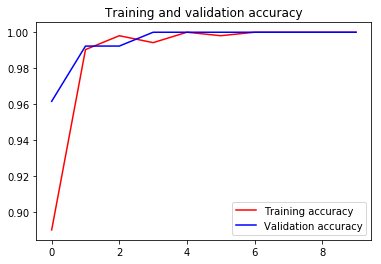

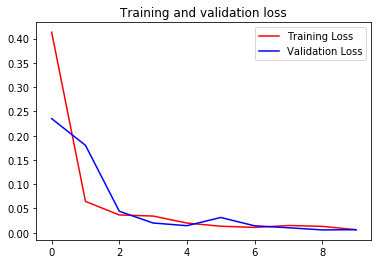

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
rounded_prediction = model.predict_classes(X_test)

In [ ]:
print(rounded_prediction)

[2 1 2 2 3 1 1 0 0 1 2 1 0 1 0 0 1 2 2 2 3 3 3 1 1 1 3 1 2 2 2 3 1 1 2 2 1
 3 0 3 2 3 3 3 3 2 1 1 1 1 1 3 0 3 3 0 2 1 2 0 1 1 0 3 0 1 1 2 1 0 0 0 1]


In [ ]:
model.save('/content/drive/My Drive/signimage5.h5')

In [ ]:
from keras.models import load_model

m = load_model('/content/drive/My Drive/signimage.h5')

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr=0.1, decay=1e-4, momentum=0.9, nesterov=True)

model.compile(loss= 'sparse_categorical_crossentropy' ,
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit_generator(train_datagen.flow(X_train_m2_images, y_train_m2, batch_size=32),
                              steps_per_epoch=len(X_train_m2_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(X_test_m2_images, y_test_m2, batch_size=32),
                              validation_steps=len(X_test_m2_images) / 32)

model.evaluate(X_test_m2_images, y_test_m2)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
100/100 [==============================] - 2s 17ms/step - loss: 2.3323
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 2.3373
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 2.3049
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 2.2956
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 2.2817
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 2.2746
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 2.3290
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 2.2964
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 2.2778
Epoch 10/10
20/20 [==============================] - 0

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


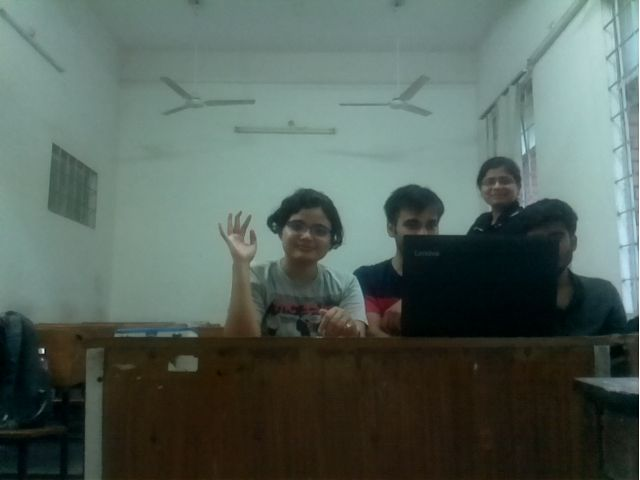

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))